In [26]:
import pandas as pd

full_data = pd.read_excel('Clean_dataset/cleaned_data.xlsx')
full_data = full_data[full_data['Caller_Company'] =='Warid'] 

In [27]:
from sklearn.preprocessing import LabelEncoder

#full_data["Call_Company"] = pd.factorize(full_data["Call_Company"])[0]
number = LabelEncoder()
full_data['Caller_Company'] = number.fit_transform(full_data['Caller_Company'].astype('str'))

#df1["Caller_Number"] = pd.factorize(full_data["Caller_Number"])[0]
full_data['Caller_Number'] = number.fit_transform(full_data['Caller_Number'].astype('str'))


full_data['Dialled_Company'] = number.fit_transform(full_data['Dialled_Company'].astype('str'))
#full_data["Calltype"] = pd.factorize(full_data["Calltype"])[0]
full_data['Calltype'] = number.fit_transform(full_data['Calltype'].astype('str'))

#full_data["Dialled_Number"] = pd.factorize(full_data["Dialled_Number"])[0]#
full_data['Dialled_Number'] = number.fit_transform(full_data['Dialled_Number'].astype('str'))


In [28]:
from sklearn.model_selection import train_test_split
X= full_data.drop(['Duration','Monetory_Rates'], axis= 1)
X_train,X_test,Y_train,Y_test = train_test_split(X, full_data.Duration,test_size = 0.33, random_state=5)


In [29]:
from sklearn.linear_model import Ridge

clf = Ridge(alpha=0.1)
clf.fit(X_train, Y_train) 

print(clf.coef_)

print(clf.intercept_)


[  1.75555628e+00   0.00000000e+00  -3.37888689e-03  -1.35744881e+01
   4.73975760e+01  -1.02162387e+01   3.79946805e-01   6.35071018e-01]
163.966506845


In [30]:
pred_train = clf.predict(X_train)
clf.score(X_train,Y_train)

0.023130742116718617

In [31]:
pred_test = clf.predict(X_test)
clf.score(X_test,Y_test)

0.022014557304704141

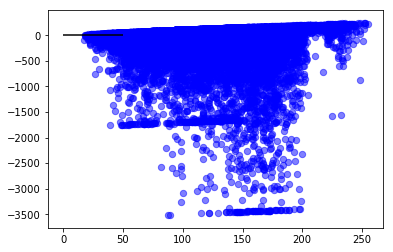

In [32]:
import matplotlib.pyplot as plt
plt.scatter(clf.predict(X_train),clf.predict(X_train)-Y_train,c='b',s=40, alpha=0.5)
plt.scatter(clf.predict(X_test),clf.predict(X_test)-Y_test,c='b',s=40, alpha=0.5)
plt.hlines(y=0,xmin=0, xmax= 50)
plt.show()

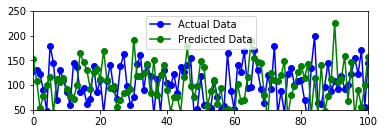

In [33]:
import matplotlib.pyplot as plt

fig= plt.figure()

#fig.subplots_adjust(bottom=0.2)

ax1 = fig.add_subplot(211)

line1=ax1.plot(pred_train,'bo-',label='Actual Data')
line2=ax1.plot(pred_test,'go-',label='Predicted Data')

ax1.set_ylim(50,250)
ax1.set_xlim(0,100)
plt.legend()
plt.show()